In this analysis, we will deduct all possible **Business Insights** from the movies dataset.
Enjoy!

In [13]:
#import all relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
#load the datsets into dataframes
df1=pd.read_csv("C:\\Users\\raymo\\Downloads\\Microsoft Movie Studio\\tngross.csv")
df2=pd.read_csv("C:\\Users\\raymo\\Downloads\\Microsoft Movie Studio\\tnproduction.csv")

In [3]:
df1.tail(2)

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross
6098,6098,"Nov 10, 2015",The Night Visitor,"$100,000",$0,$0
6099,6099,"Jul 7, 2015",Tiger Orange,"$100,000",$0,$0


In [4]:
df2.tail(2)

,Unnamed: 0,runtime_minutes,genres,production_company,production_country
6098,6098,None,Horror,None,United States
6099,6099,81 minutes,Drama,None,United States


In [14]:
#merge the datasets
df=df1.merge(df2,on='Unnamed: 0')

In [6]:
df.tail(3)

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country
6097,6097,"Mar 25, 2015",Open Secret,"$100,000",$0,$0,None,Documentary,None,United States
6098,6098,"Nov 10, 2015",The Night Visitor,"$100,000",$0,$0,None,Horror,None,United States
6099,6099,"Jul 7, 2015",Tiger Orange,"$100,000",$0,$0,81 minutes,Drama,None,United States


**DATA CLEANING**

In [15]:
#let's clean the dataset
df.dropna(inplace=True)#drops null values
df=df.drop_duplicates()
#each row has an index
df.drop('Unnamed: 0',axis=1,inplace=True)

In [14]:
#check data types
df.dtypes

release_date          object
movie                 object
production_budget     object
domestic_gross        object
worldwide_gross       object
runtime_minutes       object
genres                object
production_company    object
production_country    object
dtype: object

In [16]:
#convert to integer all relevant fields
columns_to_clean = ['production_budget','domestic_gross','worldwide_gross']
for col in columns_to_clean:
    df[col] = df[col].str.replace('[\$,]', '', regex=True)
df['production_budget'] = pd.to_numeric(df['production_budget'])
df['domestic_gross'] = pd.to_numeric(df['domestic_gross'])
df['worldwide_gross'] = pd.to_numeric(df['worldwide_gross'])

In [17]:
#convert release_date into datetime python format
from datetime import datetime
date_format = "%b %d, %Y"
df['release_date'] = pd.to_datetime(df['release_date'], format=date_format,errors='coerce')

In [18]:
#convert runtime_minutes from strings to int
df['runtime_minutes'] = df['runtime_minutes'].str.replace(' minutes', '')
df['runtime_minutes'] = pd.to_numeric(df['runtime_minutes'], errors='coerce')

In [19]:
df.dtypes

release_date          datetime64[ns]
movie                         object
production_budget              int64
domestic_gross                 int64
worldwide_gross                int64
runtime_minutes              float64
genres                        object
production_company            object
production_country            object
dtype: object

In [25]:
#check for insignificant values
df['genres'].value_counts()

Drama                1556
Comedy                960
Action                736
Adventure             688
Thriller/Suspense     573
Horror                455
Romantic Comedy       251
Documentary           111
Black Comedy          102
Musical               101
Western                71
Name: genres, dtype: int64

In [19]:
#remove all 0 values from the numerics as they have no meaning
df = df[~(df['worldwide_gross']==0)]

#rid off all insignificant counts and none values as they affect measures of central tendency and have insignificant meaning
df= df[df['genres'] != 'Concert/Performance']
df = df[df['genres'] != 'Multiple Genres']
df= df[df['genres'] != 'None']
df=df[df['production_company'] !='None']

**DATA ANALYSIS**

In [20]:
#Introduce necessary financial fields
df['Profits']=df['worldwide_gross']-df['production_budget']
df['ROI']=df['Profits']/df['production_budget']


In [21]:
df['Category']='Profitable'
df.loc[df['ROI'] < 1,'Category']='Unprofitable'

In [41]:
df.head(1)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country,Profits,ROI,Category
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,181.0,Action,Marvel Studios,United States,2397800564,5.994501,Profitable


**(i)STATISTICAL OPERATIONS**

Let's give much focus to profitabiity in this phase.

In [22]:
#let's see how many profitable movies there are
df['Category'].value_counts(normalize=True)*100

Profitable      53.810811
Unprofitable    46.189189
Name: Category, dtype: float64

53.81% of our movies are profitable.

In [60]:
#deduce production_company with highest profitable movie count
production_company_analysis=df[df['Category']=='Profitable']
count=production_company_analysis['production_company'].value_counts()
count.head(10)

Warner Bros.                       16
Marvel Studios                     15
Columbia Pictures                  14
20th Century Fox                   14
Walt Disney Pictures               12
Eon Productions, United Artists    12
Working Title Films                12
DreamWorks Animation               11
Walt Disney Animation Studios      11
Lucasfilm                          10
Name: production_company, dtype: int64

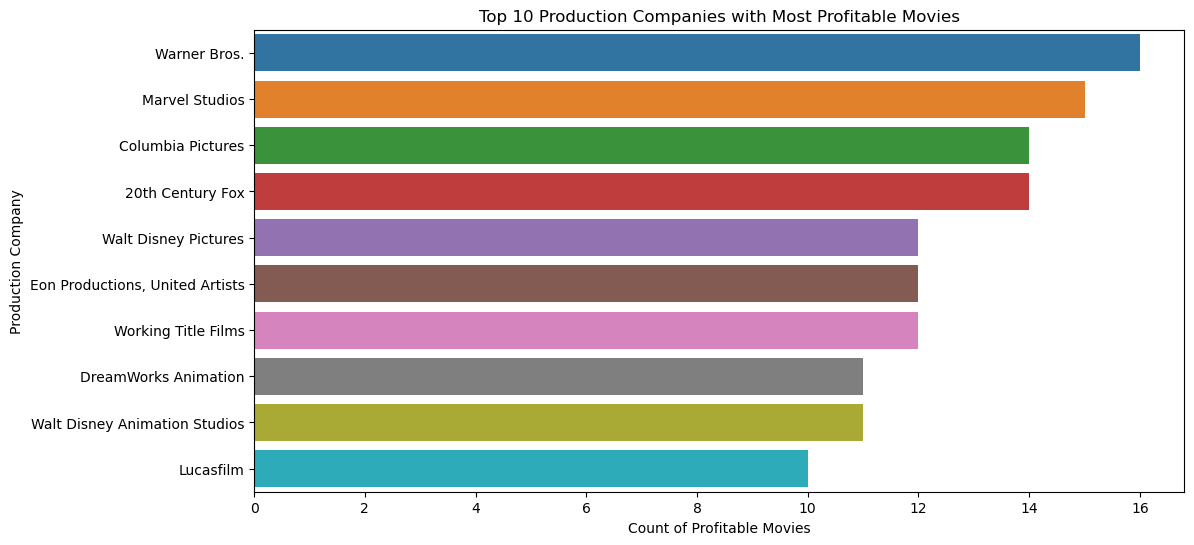

In [63]:
plt.figure(figsize=(12, 6))
sns.barplot(x=count.head(10).values, y=count.head(10).index, orient='h')
plt.xlabel('Count of Profitable Movies')
plt.ylabel('Production Company')
plt.title('Top 10 Production Companies with Most Profitable Movies')
plt.show()

Warner Bros has the highest count of profitable movies.

Neverthless, Disney is a conglomerate with several subsidiaries e.g.,Lucasfilm,Walt Disney Animation Studios,Marvel Studios and Walt Disney Pictures making it the parent company with the highest count of profitable movies.

But Studio wise,Warner Bros takes the lead. 

In [70]:
#deduce most profitable movie per year by ROI
df = df[df['release_date'].dt.year >= 2000]
most_profitable_movies = df.groupby(df['release_date'].dt.year)['movie'].apply(lambda x: x[df.loc[x.index, 'ROI'].idxmax()])
print(most_profitable_movies)

release_date
2000                     Billy Elliot
2001    Sen to Chihiro no Kamikakushi
2002         My Big Fat Greek Wedding
2003              Lost in Translation
2004                Napoleon Dynamite
2005                            Crash
2006            An Inconvenient Truth
2007                             Juno
2008                        Fireproof
2009              Paranormal Activity
2010            Paranormal Activity 2
2011                        Insidious
2012                 The Devil Inside
2013              Insidious Chapter 2
2014                 Godâs Not Dead
2015                      The Gallows
2016                        Moonlight
2017                          Get Out
2018                        Searching
2019                     Gisaengchung
2020                The Invisible Man
2021                        Nomadland
Name: movie, dtype: object


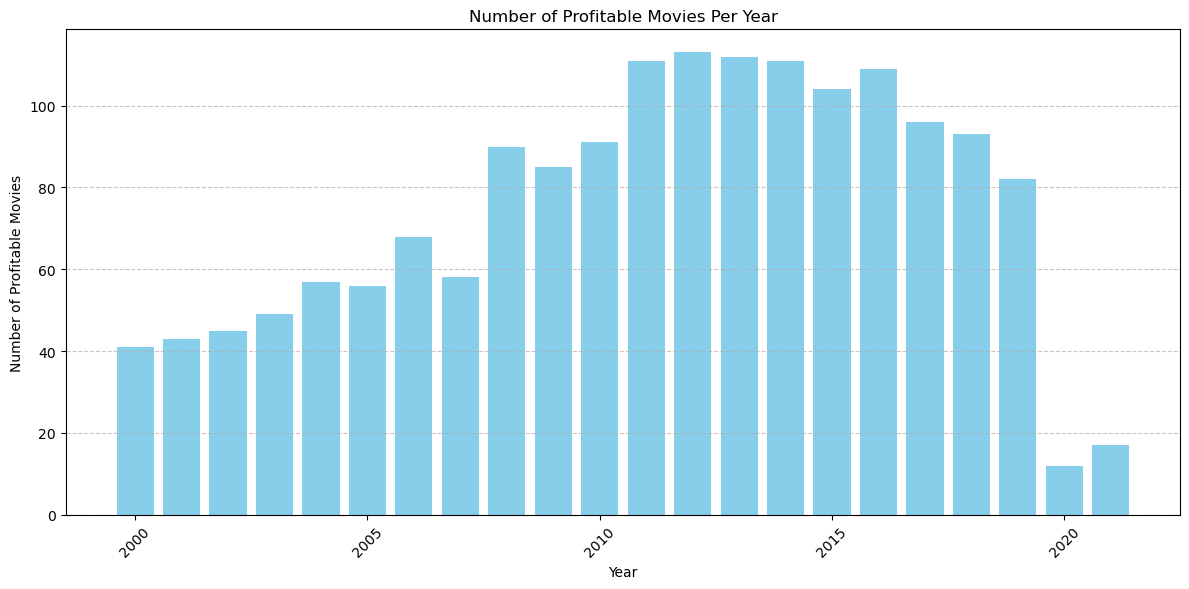

In [75]:
#let's deduce and plot the year and their profitable movies count
profitable_movies_per_year = df[df['Category'] == 'Profitable'].groupby(df['release_date'].dt.year)['movie'].count()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(profitable_movies_per_year.index, profitable_movies_per_year.values, color='skyblue')
plt.title('Number of Profitable Movies Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Profitable Movies')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Profitable movies tally have been on a gradual rise upto 2016, followed by an alarming continuos decline since then.
We can attribute the sharp decline from 2019-2020 to COVID-19 as film production was put on hold to maintain isolation measures.

In [77]:
#deduce country with highest profitable movie count
profitable_movies=df[df['Category']=='Profitable']
country_counts=profitable_movies['production_country'].value_counts()
print(country_counts.head(10))

United States                    1286
United Kingdom, United States      71
United Kingdom                     43
France                             15
Canada, United States              15
Australia, United States           14
France, United States              12
New Zealand, United States          9
Germany, United States              9
France, United Kingdom              8
Name: production_country, dtype: int64


The US has by far produced the largest number of profitable movies. And has collaborated with other countries to produce more.

In [82]:
#deduce domestic gross of profitable movies 
profitable_movies=df[df['Category']=='Profitable']
sum_domestic_gross=profitable_movies.groupby('production_country')['domestic_gross'].sum().sort_values(ascending=False)
print(sum_domestic_gross.head(10))

production_country
United States                    130339572917
United Kingdom, United States      7477984203
New Zealand, United States         2127566654
Australia, United States           1238520060
United Kingdom                      849620824
France, United States               822554767
Canada, United States               716398733
Germany, United States              568614574
Japan, United States                403151119
India, United States                355559216
Name: domestic_gross, dtype: int64


By using Domestic gross which signifys revenues from the home country only, show The US has grossed an astronomical $130 B on its profitable movies only

In [84]:
#deduce genre with highest profitable movies
profitable_movies=df[df['Category']=='Profitable']
count=profitable_movies['genres'].value_counts()
count

Drama                338
Adventure            279
Comedy               271
Action               232
Horror               181
Thriller/Suspense    174
Romantic Comedy       91
Black Comedy          27
Musical               23
Documentary           20
Western                7
Name: genres, dtype: int64

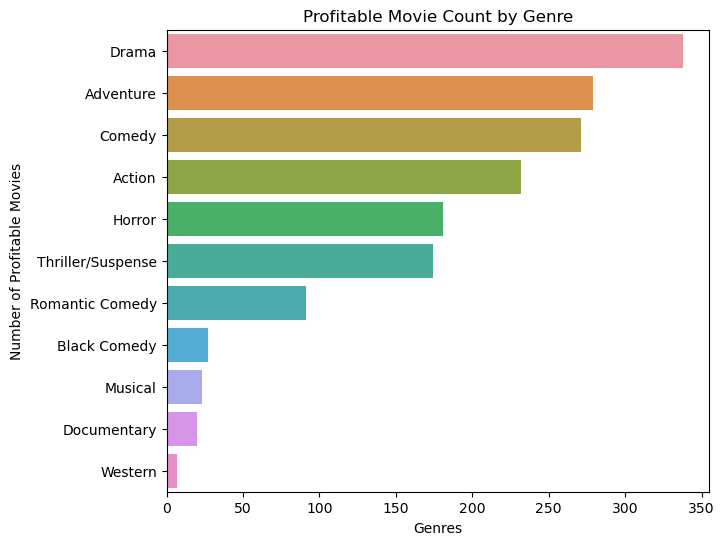

In [90]:
plt.figure(figsize=(7, 6))
sns.barplot(x=count.values, y=count.index,orient='h')
plt.xlabel('Genres')
plt.ylabel('Number of Profitable Movies')
plt.title('Profitable Movie Count by Genre')
plt.show()

In [107]:
#let's see some of these drama movies
profitable_dramas=df[(df['genres']=='Drama') & (df['Category']=='Profitable')]
profitable_dramas.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country,Profits,ROI,Category
160,2008-12-25,The Curious Case of Benjamin Button,160000000,127509326,329631958,167.0,Drama,"Paramount Pictures, The Kennedy/Marshall Company",United States,169631958,1.060200,Profitable
250,2012-11-14,"The Twilight Saga: Breaking Dawn, Part 2",136200000,292324737,829724737,115.0,Drama,"Temple Hill Entertainment, Summit Entertainmen...",United States,693524737,5.091958,Profitable


In [100]:
#drama has the highest count of profitable movies but is it the most profitable?
median_ROI=df.groupby('genres')['ROI'].median().sort_values(ascending=False)
median_ROI

genres
Horror               2.485840
Adventure            1.638852
Romantic Comedy      1.617604
Musical              1.249615
Action               1.221302
Comedy               1.103309
Black Comedy         1.029552
Thriller/Suspense    0.655024
Drama                0.637975
Documentary         -0.082182
Western             -0.427200
Name: ROI, dtype: float64

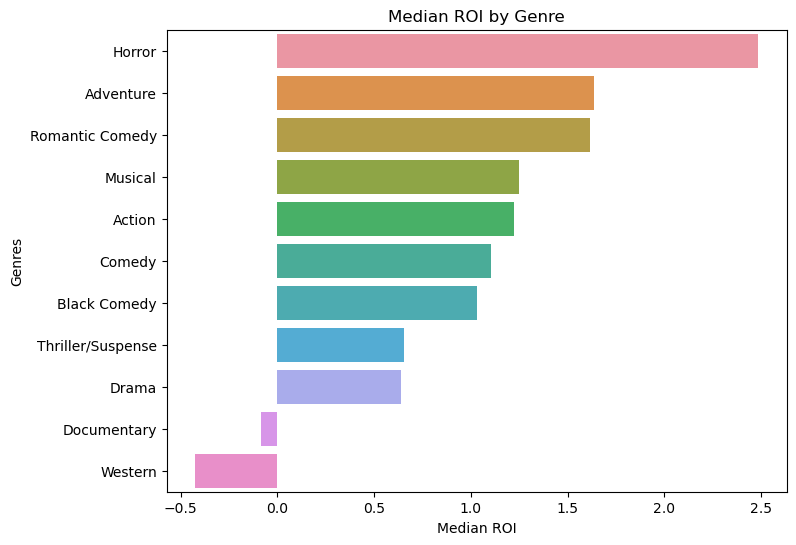

In [102]:
plt.figure(figsize=(8, 6))
sns.barplot(x=median_ROI.values, y=median_ROI.index, orient='h')
plt.xlabel('Median ROI')
plt.ylabel('Genres')
plt.title('Median ROI by Genre')
plt.show()

Horror movies on this hand is the most profitable genre while Documentaries and Western reporting losses. 

In [98]:
#classify genres by cost of production
median_budget=df.groupby('genres')['production_budget'].median().sort_values(ascending=False)
median_budget

genres
Adventure            81000000.0
Action               70000000.0
Musical              53000000.0
Western              32500000.0
Romantic Comedy      28000000.0
Thriller/Suspense    26000000.0
Comedy               21000000.0
Black Comedy         15000000.0
Drama                15000000.0
Horror               12000000.0
Documentary           1450000.0
Name: production_budget, dtype: float64

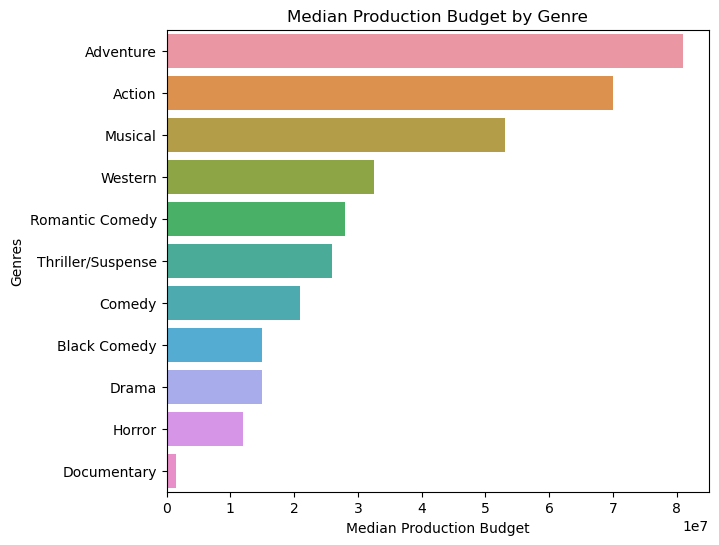

In [97]:
plt.figure(figsize=(7, 6))
sns.barplot(x=median_budget.values, y=median_budget.index, orient='h')
plt.xlabel('Median Production Budget')
plt.ylabel('Genres')
plt.title('Median Production Budget by Genre')
plt.show()

Adventures are the most expensive with a median cost of $81,000,000! to make while documentaries are the cheapest.

In [106]:
#let's see an example of adventure movie
adventures=df[(df['genres']=='Adventure') & (df['Category']=='Profitable')]
adventures.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country,Profits,ROI,Category
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,136.0,Adventure,Walt Disney Pictures,United States,666713802,1.759139,Profitable
3,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,136.0,Adventure,"Lucasfilm, Bad Robot",United States,1758615817,5.747111,Profitable


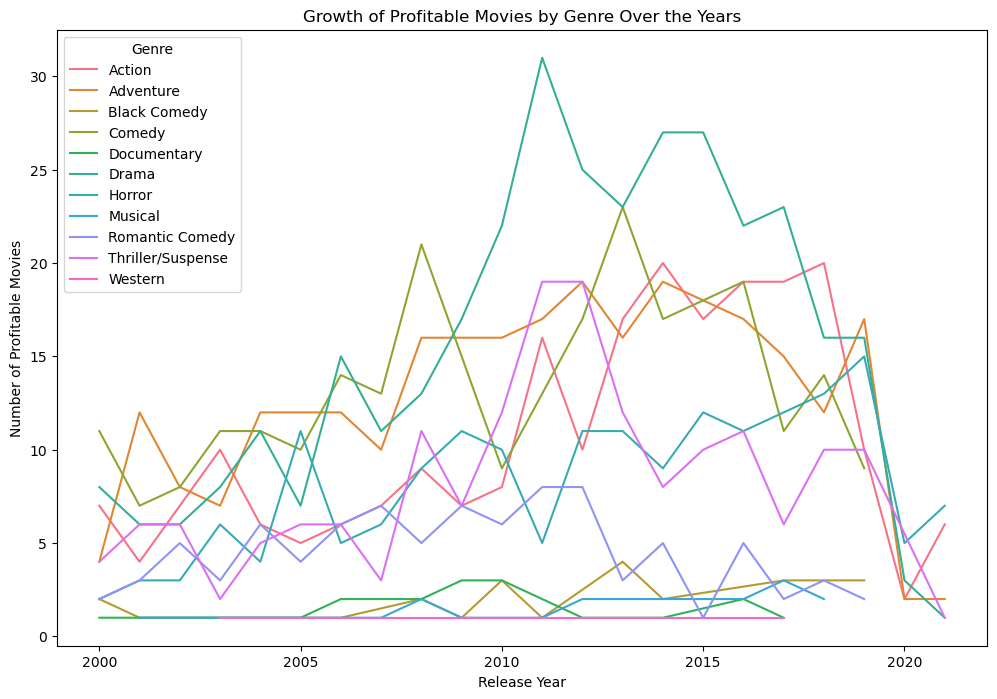

In [116]:
#deduce growth by the number of profitable movies release in the last 20 years

profitable_movies = df[df['Category'] == 'Profitable']

# Group by 'genres' and 'release_year', and count the number of movies
genre_year_counts = profitable_movies.groupby(['genres', profitable_movies['release_date'].dt.year])['movie'].count().reset_index()
genre_year_counts.columns = ['Genre', 'Release_Year', 'Movie_Count']

# Plot the results using Seaborn
plt.figure(figsize=(12, 8))
sns.set_palette("husl")
sns.lineplot(data=genre_year_counts, x='Release_Year', y='Movie_Count', hue='Genre')
plt.title('Growth of Profitable Movies by Genre Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Profitable Movies')
plt.legend(title='Genre')
plt.show()


All Genre counts have dipped in recent times but majority report gradual growth over time with the exception of Western movies.

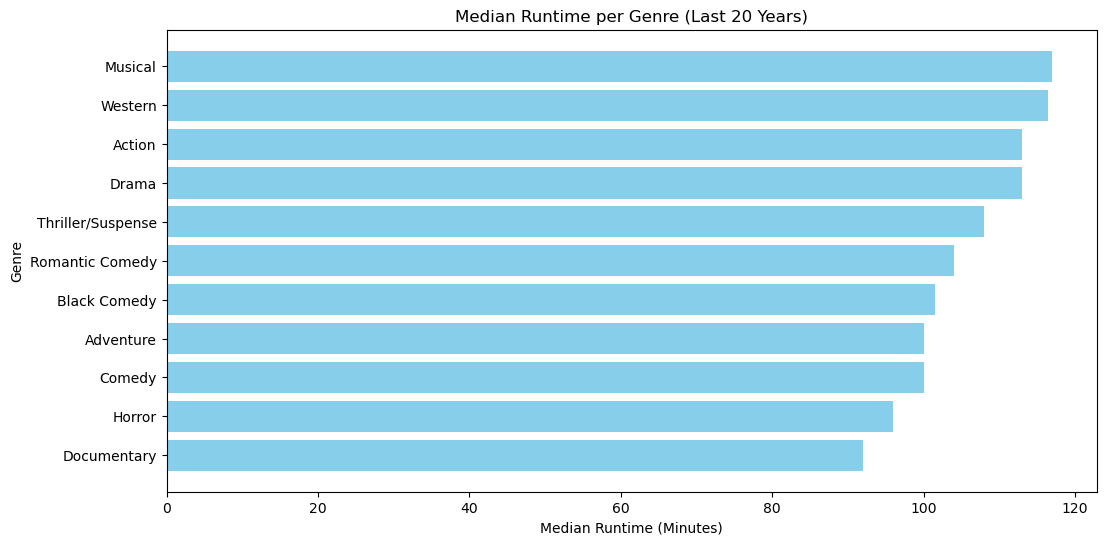

In [118]:
#deduce any trend in runtime_minutes across all genres over the last 20 years
df_last_20_years = df[df['release_date'].dt.year >= 2003]

# Group by 'genres' and calculate the median runtime for each genre
genre_runtime_median = df_last_20_years.groupby('genres')['runtime_minutes'].median().reset_index()
genre_runtime_median.columns = ['Genre', 'Median_Runtime_Minutes']

# Sort the genres by median runtime
genre_runtime_median = genre_runtime_median.sort_values(by='Median_Runtime_Minutes', ascending=False)
# Plot the results using a bar chart
plt.figure(figsize=(12, 6))
plt.barh(genre_runtime_median['Genre'], genre_runtime_median['Median_Runtime_Minutes'], color='skyblue')
plt.xlabel('Median Runtime (Minutes)')
plt.ylabel('Genre')
plt.title('Median Runtime per Genre (Last 20 Years)')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()

Unsuprisingly, over the last 20 years Musicals have registered the longest runtime_minutes(117 minutes) whereas Documentaries(92 minutes) have the least by median.

In [120]:
genre_runtime_median

,Genre,Median_Runtime_Minutes
7,Musical,117.0
10,Western,116.5
0,Action,113.0
5,Drama,113.0
9,Thriller/Suspense,108.0
8,Romantic Comedy,104.0
2,Black Comedy,101.5
1,Adventure,100.0
3,Comedy,100.0
6,Horror,96.0


In [24]:
#let's see an example of musicals
Musical=df[(df['genres']=='Musical') & (df['Category']=='Profitable')]
Musical.head(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country,Profits,ROI,Category
14,2010-11-24,Tangled,260000000,200821936,584899819,101.0,Musical,Walt Disney Animation Studios,United States,324899819,1.249615,Profitable
116,2017-10-27,Coco,175000000,210460015,797666425,105.0,Musical,"Disney-Pixar, Walt Disney Pictures",United States,622666425,3.558094,Profitable
151,2017-03-16,Beauty and the Beast,160000000,504014165,1253802559,123.0,Musical,"Walt Disney Pictures, Mandeville Films",United States,1093802559,6.836266,Profitable


**CONCLUSION**

1. Warner Bros would be a good ivestment choice as it has reported the highest count of profitable movies,signifying skills at what they do.

2. Disney is a succesful player in the film industry. Having more than 50% count in total of the profitable movie count through it's subsidiaries.

   It has managed to pull this via acquisitions suggesting good business strategies.
3. Majority of the most profitable movies per year are Horrors e.g., Get Out givig us an impression a well scripted Horror movie will report good returns

4. The number of profitable movies has been growing consistently until 2016, where the numbers have dropped without recovery.
   The sharp 2020 decline can be attributed to the lockdown and quarantine measures imposed worldwide to mitigate COVID-19.
   
5. US has the highest profitable movie count and the highest profit grossings worldwide. Americans love movies and shooting a good movie there gives you an upperhand in higher worldwide grossings.
    It's also worth noting the US has succesfully partnered with other Nations in production cementing its mark as the preffered production country preferrably due to their incentives to the movie industry.
    
6. Drama has the highest count of profitable movies signifying a good reception by the market e.g., The Twilight Saga: Breaking Dawn, Part 2. We will take profits to signify good sales thus we can say people love drama movies.

7. Horror movies are the most profitable given their high grossings and low production costs.

8. Adventure movies are the most expensive to make, not buy surprise given their lighting needs, CGI, star-studded casts and number of crew.

9. Musicals have the highest runtime minutes, not by surprise given the dancing scenes and dialogues. An example of musical is Beauty and the Beast, Coco.